In [1]:
import matplotlib.pyplot as plt
import matplotlib.path as path
import os

import numpy as np

We import the library

In [2]:
import detuningaxis

We load the dataset and we have look to it

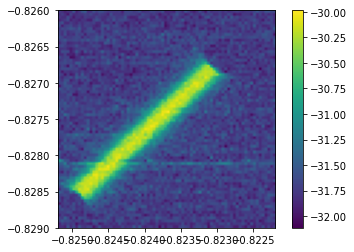

In [3]:
data = np.load('interdot_data.npy',allow_pickle='TRUE').item()
mag = data['vna_CM_vna_CM_point_s12_magnitude']
G1 = data['G1_G4']
G2 = data['G2']

def show(x,y,mag): 
    x = np.sort(x)
    y = np.sort(y)
    figure,axis = plt.subplots(1,1)
    fig = plt.imshow(mag,origin = "lower",extent = [x[0],x[-1],y[0],y[-1]])
    figure.colorbar(fig)
show(G1[0], G2[:,0],mag)

We instantiate the object that perform the detection of the rectangle and fit it.

In [4]:
fitter = detuningaxis.DetuningAxisFitter()
fitter.fit(G1,G2,mag)

Instances of DetuningAxisFitter are callable.
Considering the vector $\vec{e}_x$ and $\vec{e}_y$ that are the long and short axis of the fitted rectangle, respectively, let $\alpha$ be its center.
fitter(x,y) returns the coordinates of the points $\beta$ define by
\begin{equation}
    \beta = \alpha + x \vec{e}_x  + y \vec{e}_y 
\end{equation}

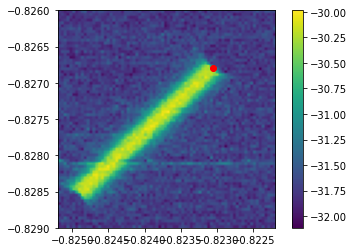

In [5]:
show(G1[0], G2[:,0],mag)
x,y = fitter(1,0)
plt.scatter(x,y,color = "red")

This function accepts in place of x,y numpy array:

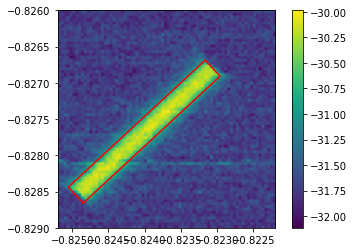

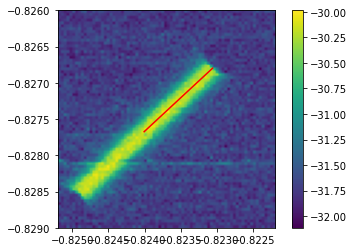

In [6]:
show(G1[0], G2[:,0],mag)
x,y = fitter( np.array([-1,1,1,-1,-1]), np.array([-1,-1,1,1,-1]) )
plt.plot(x,y,color = "red")

show(G1[0], G2[:,0],mag)
x,y = fitter( np.linspace(0,1),np.linspace(0,0) )
plt.plot(x,y,color = "red")

It may be interessting to know that the data points extracted from the background are stored in fitter.signal.

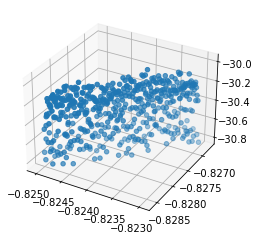

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(fitter.signal[:,0],fitter.signal[:,1],fitter.signal[:,2])